## Project Overview

This project is about gathering information about the Twitter account WeRateDogs from different formats and wrangle the datasets to produce trustworthy analyses and visualisations. 

The different files gathered include: 
- The Twitter archive of WeRateDogs containing basic information about each tweet
- A json file containing information on favorite, retweet and follower count gathered via Twitters API tweepy
- An image prediction table containing predictions for the top 3 dog breeds for each image


## Table of Contents
- [Gathering](#gathering)
- [Assessing](#assessing)
- [Summary of Issues](#issues)
- [Cleaning](#cleaning)
- [Analyzing](#analyzing)
    - [Univariate Exploration](#univariate)
    - [Bivariate Exploration](#bivariate)
    - [Multivariate Exploration](#multivariate)
    - [Bonus](#bonus)

<a id='intro'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import json
import tweepy
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Gathering

<a id='gathering'></a>

In [2]:
# download image prediction tsv file programatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [3]:
# save image prediction file in project folder
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

Assign Image Predictions file to a Dataframe:

In [2]:
df1 = pd.read_csv('image-predictions.tsv', sep='\s+')

In [5]:
df1.tweet_id.count()

2075

Import the twitter archive file:

In [3]:
df2 = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
df2.tweet_id.count()

2356

Query retweet, favorite and follower count for each tweet id via the Twitters API tweepy:

In [8]:
# authorize tweepy

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
# get a test tweet to see how information is stored in tweepy
test_tweet = api.get_status(df2.tweet_id[1000], tweet_mode='extended')

In [10]:
test_tweet._json

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

Now query each tweet id contained in df2 to get additional information about favorite-, retweet-, and follower count.

In [11]:
data = {}
data['tweet'] = []
tweet_count = 1
tweet_errors = {}

for tweet_id in df2.tweet_id.values:
    try: 
        tweet = api.get_status(tweet_id, tweet_mode='extended') 
        
        # get info for retweet count, favorite count and followers count
        json_tweet = tweet._json
        retweet_count = json_tweet['retweet_count']
        favorite_count = json_tweet['favorite_count']
        followers_count = json_tweet['user']['followers_count']
        
        # append the infos to the data dict.
        data['tweet'].append({'tweet_id': tweet_id,
                              'retweet_count': retweet_count, 
                              'favorite_count': favorite_count, 
                              'followers_count': followers_count
                              })
        
        tweet_count += 1
         
        # catch errors in tweet errors dict.
    except Exception as e:
            print('An Error occured on ID: ' + str(tweet_id) + 'Error Message: ' + str(e))
            tweet_errors[str(tweet_id)] = json_tweet

An Error occured on ID: 888202515573088257Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 873697596434513921Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 872668790621863937Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 869988702071779329Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 866816280283807744Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 861769973181624320Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 845459076796616705Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 842892208864923648Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 837012587749474308Error Message: [{'code

Rate limit reached. Sleeping for: 581


An Error occured on ID: 758828659922702336Error Message: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))
An Error occured on ID: 754011816964026368Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]
An Error occured on ID: 680055455951884288Error Message: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 493


An Error occured on ID: 676975532580409345Error Message: Failed to send request: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))


In [12]:
# tweet ids which no longer exist/where query failed due to connection abort
tweet_errors.keys()

dict_keys(['888202515573088257', '873697596434513921', '872668790621863937', '869988702071779329', '866816280283807744', '861769973181624320', '845459076796616705', '842892208864923648', '837012587749474308', '827228250799742977', '812747805718642688', '802247111496568832', '775096608509886464', '770743923962707968', '758828659922702336', '754011816964026368', '680055455951884288', '676975532580409345'])

The following numpy encoder was necessary for me to be able to write the json object to a txt file.

In [13]:
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, (np.int_, np.intc, np.intp, np.int8,
            np.int16, np.int32, np.int64, np.uint8,
            np.uint16, np.uint32, np.uint64)):
            return int(obj)
        
        return json.JSONEncoder.default(self, obj)

In [14]:
# store json object in txt file for later use
with open('tweet_json.txt', 'w') as json_file:
    for tweet in data['tweet']:
        json.dump(tweet, json_file, cls=NumpyEncoder)
        json_file.write('\n')

Resources:
- [handle numpy encoder error](https://stackoverflow.com/questions/26646362/numpy-array-is-not-json-serializable/32850511)

- [dump json to txt](https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line)

In [4]:
# assign api data to df3
df3 = pd.read_json('tweet_json.txt', lines=True)

## Assessing

<a id='assessing'></a>

This part is about assessing each of the three dataframes for issues which need to be adressed prior to analyzing the datasets.
I'll start by doing some visual assessment for quality and tidyness issues and will later also switch to programmatic methods.

In [5]:
df1

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


<p style='text-align: justify;'>
First thing that catches my mind is that the dataframe is encoded in a way that each variable has its own column together with each prediction confidence (1, 2 and 3). This results in many partly redundant columns. I prefer to have one column containing the prediction confidence and the only one column each for prediction, confidence and dog. 
<p style='text-align: justify;'>

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The column tweet_id is of type integer when in fact object would be more appropriate as I do not intend to perform any kind of calculation with this column. Other than that, df1 looks not too bad.

In [7]:
df2

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

There are several issues which caught my mind so far:
- First of all, retweets and replies are included (and with them the related columns id and timestamp). This project is intended to only analyze original tweets by WeRateDog's and there not consider retweets and replies. Long story short, they need to get removed
- Second: there is one column for each dog stage value. This is not an efficient way to store information and a burden when trying to analyze them later. Solution would be combining them into one column with each stage being a possible value.
- Third: there are several erroneous datatypes. Like before, tweet_id should be of type object. Timestamp should be of typ datetime to allow for time series analyzes later. rating_numerator and denominator should be of type float as nothing prevents WeRateDogs from indroducing half numbers. And the final dog_stage column should be of type categorical.

In [9]:
df2.name.value_counts().nlargest(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Bailey       7
an           7
Daisy        7
Buddy        7
Toby         7
Oscar        6
Leo          6
Name: name, dtype: int64

There are some obvious flaws with the names column. The algorithm did mistake 'None' and several other adjectives for real names. This needs to be adressed.

In [10]:
df2.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

The only valid denominator in WeRateDog's unique rating system is 10. All other values are simply erroneous and need be get removed.

In [11]:
df2.rating_numerator.value_counts().nlargest(15)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
Name: rating_numerator, dtype: int64

Same issue for the rating numerator.The only valid numerators are 10, 11, 12, 13 and 14. All other values are not conform with WeRateDogs's rating system.

In [12]:
print(df2.text.loc[1])
df2.text.loc[1500]

This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV


"This is Edgar. He's a Sassafras Puggleflash. Nothing satisfies him. Not since the war. 10/10 cheer up pup https://t.co/1NgMb9BTWB"

The ``text`` column in df2 (twitter archive) contains a shortened hyperlink at the end. This hyperlink does not add anly value and is misplaced here. I will therefore need to drop it.

Moving to df3 (tweepy query):

In [13]:
df3

,favorite_count,followers_count,retweet_count,tweet_id
0,38017,7631084,8315,892420643555336193
1,32642,7631084,6143,892177421306343426
2,24564,7631084,4067,891815181378084864
3,41369,7631084,8458,891689557279858688
4,39553,7631084,9158,891327558926688256
5,19860,7631084,3049,891087950875897856
6,11613,7631084,2019,890971913173991426
7,64155,7631084,18446,890729181411237888
8,27289,7631084,4183,890609185150312448
9,31309,7631084,7215,890240255349198849


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 4 columns):
favorite_count     2338 non-null int64
followers_count    2338 non-null int64
retweet_count      2338 non-null int64
tweet_id           2338 non-null int64
dtypes: int64(4)
memory usage: 73.1 KB


In [15]:
df3.describe()

,favorite_count,followers_count,retweet_count,tweet_id
count,2338.000000,2.338000e+03,2338.000000,2.338000e+03
mean,7959.869974,7.631132e+06,2928.675791,7.422384e+17
std,12331.665185,5.786904e+01,4935.306555,6.834068e+16
min,0.000000,7.631084e+06,0.000000,6.660209e+17
25%,1371.000000,7.631097e+06,587.250000,6.783509e+17
50%,3460.500000,7.631132e+06,1367.000000,7.186224e+17
75%,9736.750000,7.631145e+06,3410.500000,7.986971e+17
max,164239.000000,7.631800e+06,83629.000000,8.924206e+17


Like for the other dataframes, tweet_id is also of type integer here, when in fact object is the more appropriate type. I'm a little bit suspecious with the followers count almost not changing at all, will have to see later about that.

<a id='issues'></a>
## Summary of Observations

### Quality Issues:

#### df1 (dog breed prediction):
- The dataframe is encoded in a way that each variable has its own column together with each prediction confidence (1, 2 and 3). This results in many partly redundant columns. I prefer to have one column containing the prediction confidence and the only one column each for prediction, confidence and dog (Hard to describe in words exactly what I mean, you'll when I get to cleaning this issue.).
- The column Tweet_id should be of type object instead of integer as no calculations are intended to be performed with it.

#### df2 (twitter archive):
- Retweets and replies are included in the df. The idea of this project is to only analyze original tweets excluding retweets and replies. Those rows therefore need to be removed.
- The four columns containing the information about about the different dog stages (pupper, puppo, doggo, floofer) each contain the string None when in fact they should be assigned to a real NaN to not influence any statistic.
- The timestamp is not a datetime object. Currently it is of type string. As type datetime, the column will be a lot more valuable later on as this allows for time series analyses.
- The column rating_denominator does not solely contain the value 10. WeRateDog's unique rating system does only allow for a denominator of 10. All other values therefore need to be regarded as erronous and consequently need to be removed. Furthermore the type should be changed to float.
- Like for the rating_denominator, WeRateDog's rating system currently allows the rating_*numerator* value only to be in range 10 to 14. Additionally, change type to float.
- The Tweet_id column should be of type object because no numeric operations are intendet to be performed with them.
- The column Dog does not solely contain valid names. The algorithm did mistake some verbs and adjectives for names and those need to be removed to get a true representation of the most common name.
- The column text is appended with a shortened hyperlink. This is not intended and should be removed as the hyperlink does not add any value here.


#### df3 (tweepy query):
- Like with the dataframes before, the column Tweet_id should be of type object instead of integer.

### Tidyness Issues:

- The twitter archive (df2) contains one column for each possible dog stage. This is not an efficient way to store data and those columns should therefore be combined into one column with each dog stage being a value.
- The twitter archive (df2) and the tweepy query (df3) are basically both centered around basic tweet data combined with popularity measures. I thus prefer to have them combined in one dataframe.
- Several columns will become redundant during the cleaning process and can thus be removed all together.

## Cleaning

<a id='cleaning'></a>

In [16]:
# create a copy of one df where all the cleaning work will be executed on. (Ensures that there's a backup just in case)
df_clean = df2.copy()
predictions_clean = df1.copy()
tweepy_clean = df3.copy()

#### Define
<p style='text-align: justify;'>
Remove all retweets and replies. A tweet can be identified as a reply if the  column ``in_reply_to_status_id`` does contain a value other than NaN. Similarly a tweet is a retweet if the column ``retweeted_status_id`` contains a value other than NaN. The idea therefore is to drop all rows where either of the two columns contains a value other than NaN.
<p style='text-align: justify;'>

#### Code

In [17]:
df_clean.drop(df_clean[df_clean['in_reply_to_status_id'].notnull()].index, inplace=True)
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()].index, inplace=True)

#### Test

In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

The dataframe now contains 2097 rows instead of the prior 2356 and all tweets which were either retweets or replies were removed.

#### Define
<p style='text-align: justify;'>
The columns ``in_reply_to_status_id``, ``in_reply_to_user_id``, ``retweeted_status_id``, ``retweeted_status_user_id`` and ``retweeted_status_timestamp`` now add no more value to the project, which is why I'm going to drop them now.
<p style='text-align: justify;'>

#### Code

In [19]:
df_clean.drop(labels=['in_reply_to_status_id',
                       'in_reply_to_user_id', 
                       'retweeted_status_id', 
                       'retweeted_status_user_id', 
                       'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


The columns are now no longer stored in the dataframe.

#### Define
<p style='text-align: justify;'>
Replace all 'None' values in the columns doggo, floofer, pupper and puppo with actual NaNs. Then combine the 4 indivdual columns to a new column dog_stage whichs contains any of the the dog stage as a value and NaN if no stage was specified in the tweet. This is achieved first replacing the word ``None`` in each dog stage column with '' and then feature engineering a new column by adding up all dog stage columns.
<p style='text-align: justify;'>

#### Code

In [21]:
dog_stage = ['doggo', 'floofer', 'pupper', 'puppo']

df_clean[dog_stage] = df_clean[dog_stage].replace('None', '')

In [22]:
df_clean['dog_stage'] = df_clean['doggo'] + df_clean['floofer'] + df_clean['pupper'] + df_clean['puppo']
df_clean['dog_stage'] = df_clean['dog_stage'].replace('', np.NaN)

#### Test

In [23]:
df_clean.dog_stage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggofloofer      1
doggopuppo        1
Name: dog_stage, dtype: int64

#### Define

While testing if the code was successful, I realized another issue. Some tweets actually contained multiple dog stages in their text. This is why some values in the ``dog_stage`` column now contain a 'double name'. I will address this now by creating a value 'multiple' with pandas ``.replace`` method.

#### Code

In [24]:
df_clean.dog_stage = df_clean.dog_stage.replace(['doggopupper', 'doggofloofer', 'doggopuppo'], 'multiple')

#### Test

In [25]:
df_clean.dog_stage.value_counts()

pupper      221
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

Now tweets mentioning several dog types are cumulated under the value multiple.

#### Define
Remove the columns pupper, doggo, puppo and floofer since the column dog_stage now holds all the neccessary information and they are thus now no longer needed.

#### Code

In [26]:
df_clean.drop(labels=['pupper',
                      'doggo',
                      'puppo',
                      'floofer'], axis=1, inplace=True)

#### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### Define
Change the type of the timestamp column to datetime. This is done using ``pd.to_datetime()``. I add ``dt.normalize()`` to only display the information of year, month and day in the dataframe. This is more visually appealing to me and does still preserve the type datetime64[ns].

#### Code

In [28]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp, yearfirst=True).dt.normalize()

#### Test

In [29]:
df_clean.timestamp.sample(3)

996   2016-06-30
854   2016-08-15
957   2016-07-08
Name: timestamp, dtype: datetime64[ns]

#### Define
Drop all rows where the rating_denominator is not equal to 10. This is equal to only keeping rows where the denominator is 10.

#### Code

In [30]:
df_clean = df_clean[df_clean['rating_denominator'] == 10]

#### Test

In [31]:
df_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

Now 10 is the only value.

#### Define
Drop all rows where rating_numerator is not in range 10-14. Values less than 10 or higher than 14 currently do not conform with WeRateDogs unique rating system and thus have to be considered faulty. This is achieved using the ``.bettween()`` method.

#### Code

In [32]:
df_clean = df_clean[df_clean['rating_numerator'].between(10, 14, inclusive=True)]

#### Test

In [33]:
df_clean.rating_numerator.unique()

array([13, 12, 14, 11, 10], dtype=int64)

#### Define
Remove the hyperlink from each element in the text column. The Hyperlink is always 23 digits long which is why I'll strip the last 24 digits.

#### Code

In [34]:
df_clean.text = df_clean.text.str[:-24]

#### Test

In [35]:
# example Text
df_clean.text.loc[200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs"

#### Define
Merge df_clean with tweepy_clean as both are centered around the same questions.

#### Code

In [36]:
df_clean = pd.merge(df_clean, tweepy_clean, on='tweet_id')

#### Test

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null int64
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null int64
rating_denominator    1656 non-null int64
name                  1656 non-null object
dog_stage             290 non-null object
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 168.2+ KB


#### Define
In predictions_clean, the columns for prediction, confidence and whether the prediction is indeed a dog contain the values of the confidence order. Columns should only contain the variables and not the values for confidence oreder to make querying easier. First, I'll rename each column so that it is in the format: ``variable_value``, then apply ``pd.wide_to_long`` to transform the df. [Pandas Documentation for pd.wide_to_long](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.wide_to_long.html)

#### Code

In [38]:
prediction_column_names = ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1', 'dog_1',\
                           'prediction_2', 'confidence_2', 'dog_2', 'prediction_3', 'confidence_3', 'dog_3']
predictions_clean.columns = prediction_column_names

In [39]:
predictions_clean = pd.wide_to_long(predictions_clean, stubnames=['prediction', 'confidence', 'dog'],\
                                    i=['tweet_id', 'jpg_url', 'img_num'], j='confidence_order',
                                    sep='_').reset_index()

#### Test

In [40]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,confidence_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [41]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
tweet_id            6225 non-null int64
jpg_url             6225 non-null object
img_num             6225 non-null int64
confidence_order    6225 non-null int64
prediction          6225 non-null object
confidence          6225 non-null float64
dog                 6225 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 298.0+ KB


Much better. Now the dataframe predictions_clean is shrunk to only 7 columns while still holding the exact same information. Each tweet_id does now occur in 3 rows as each tweet comes with 3 predictions stored as values in the confidence_order column

#### Define

Erroneous Datatypes:

Change type of tweet_id from int to str (object) in both dfs. 

Change type of dog_stage in df_clean from object to categorical.

Change type of rating_denominator and numerator to float.

#### Code

In [42]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)

In [43]:
df_clean.dog_stage = df_clean.dog_stage.astype('category')
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)

#### Test

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null object
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null float64
rating_denominator    1656 non-null float64
name                  1656 non-null object
dog_stage             290 non-null category
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 157.1+ KB


#### Define

Synchronize the predictions_clean dataframe with df_clean so that the predictions_clean df only contains predictions for tweet_id's which are also available in df_clean. This avoids storing unnecessary information. 

One possible solution is to create a dummy dataframe containing the tweet_id one one other random variable. Then do an inner merge of the dummy dataframe with the predictions_clean dataframe.

#### Code

In [45]:
available_tweets = df_clean['tweet_id'].reset_index()
predictions_clean = pd.merge(predictions_clean, available_tweets, on=['tweet_id'])

#### Test

In [46]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4610
Data columns (total 8 columns):
tweet_id            4611 non-null object
jpg_url             4611 non-null object
img_num             4611 non-null int64
confidence_order    4611 non-null int64
prediction          4611 non-null object
confidence          4611 non-null float64
dog                 4611 non-null bool
index               4611 non-null int64
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 292.7+ KB


<p style='text-align: justify;'>
The predictions_clean df now contains 4611 rows compared to prior 6225 rows. Divided by 3, this means 538 unique tweet_id's where dropped in predictions_clean. 4611 divided by 3 is 1537. Df_clean contains 1656 rows which means that we do not have predictions for the dog breed for 119 images. However, I do not want to drop those tweet_ids in df_clean since I do not want to drop 119 rows in df_clean and I can live with some tweets not having a prediction for the dog breed.
<p style='text-align: justify;'>

#### Define
Clean the ``name`` column in df_clean. For all names which are no 'real' names, set the value to NaN.

1. Get a list of all names which are not uppercase. Names which are not uppercase are likely to be verbs or adjectives mistakenly taken as a 'real' name by the algorithm.

2. Replace all lowercase names with NaN + replace 'None' with NaN.

#### Code

In [47]:
lowercase_names = df_clean[df_clean['name'].str.islower()]
lowercase_names = lowercase_names.name.unique()
lowercase_names

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my',
       'his', 'actually', 'just', 'getting', 'mad', 'all', 'old',
       'infuriating', 'an', 'by', 'officially', 'the', 'life', 'light',
       'space'], dtype=object)

In [48]:
df_clean.name = df_clean.name.replace(lowercase_names, np.NaN)
df_clean.name = df_clean.name.replace('None', np.NaN)

#### Test

In [49]:
df_clean.name.str.islower().sum()

0

#### Final Check

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null object
timestamp             1656 non-null datetime64[ns]
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null float64
rating_denominator    1656 non-null float64
name                  1128 non-null object
dog_stage             290 non-null category
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 157.1+ KB


In [51]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4611 entries, 0 to 4610
Data columns (total 8 columns):
tweet_id            4611 non-null object
jpg_url             4611 non-null object
img_num             4611 non-null int64
confidence_order    4611 non-null int64
prediction          4611 non-null object
confidence          4611 non-null float64
dog                 4611 non-null bool
index               4611 non-null int64
dtypes: bool(1), float64(1), int64(3), object(3)
memory usage: 292.7+ KB


#### Export each of the two cleaned DataFrames to a master csv file

In [52]:
df_clean.to_csv('twitter_archive_master.csv', index=False)
predictions_clean.to_csv('predictions_master.csv', index=False)

#### Import the csv files for analysis

In [53]:
archive = pd.read_csv('twitter_archive_master.csv')
predictions = pd.read_csv('predictions_master.csv')

In [54]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 12 columns):
tweet_id              1656 non-null int64
timestamp             1656 non-null object
source                1656 non-null object
text                  1656 non-null object
expanded_urls         1653 non-null object
rating_numerator      1656 non-null float64
rating_denominator    1656 non-null float64
name                  1128 non-null object
dog_stage             290 non-null object
favorite_count        1656 non-null int64
followers_count       1656 non-null int64
retweet_count         1656 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 155.3+ KB


The specified data types where lost while exporting the df to a csv file. Therefore they need to be specified again.

In [55]:
archive.tweet_id = archive.tweet_id.astype(str)
archive.timestamp = pd.to_datetime(archive.timestamp, yearfirst=True).dt.normalize()
archive.dog_stage = archive.dog_stage.astype('category')

In [56]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4611 entries, 0 to 4610
Data columns (total 8 columns):
tweet_id            4611 non-null int64
jpg_url             4611 non-null object
img_num             4611 non-null int64
confidence_order    4611 non-null int64
prediction          4611 non-null object
confidence          4611 non-null float64
dog                 4611 non-null bool
index               4611 non-null int64
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 256.7+ KB


In [57]:
predictions.tweet_id = predictions.tweet_id.astype(str)

## Analyzing and Visualizing
<a id='analyzing'></a>

#### \*\*\*This is the just an exploratory part data analysis. For a clean, explanatory, presentation of findings, please check out the act_report html file***

### Univariate Data Exploration
<a id='univariate'></a>

#### Check the distribution of the ``rating_nominator`` variable in the ``archive`` df.

In [58]:
base_color = '#708090'

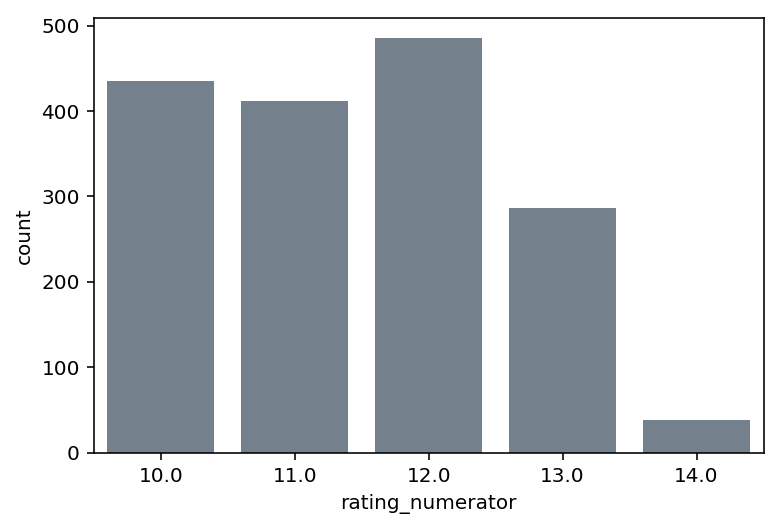

In [59]:
sns.countplot(data = archive, x = 'rating_numerator', color = base_color);

The three most common ratings are 10, 11 and 12. The highest possible rating, 14, is the rarest one.

#### Check the distribution of the ``favorite_count`` in the ``archive`` df.

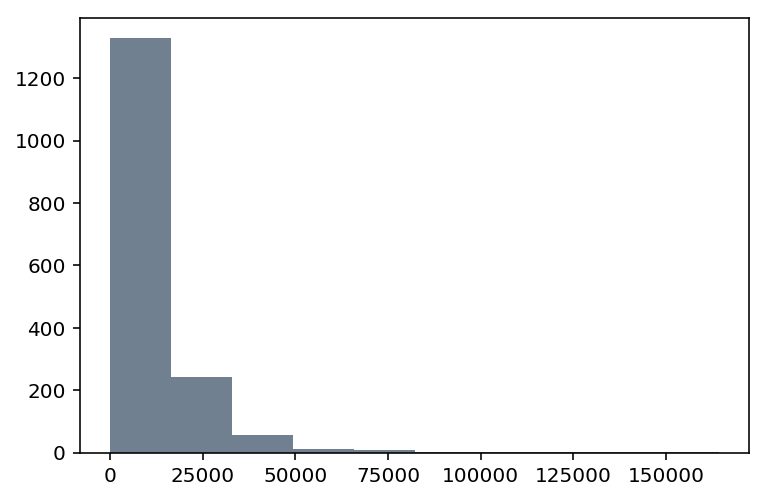

In [60]:
plt.hist(archive.favorite_count, color = base_color);

The default settings of matplotlib heavily skew the histogram to the right, this is likely because of few outliers to the right and large bin sizes. Therefore I chose to now only select the 95% quantile and reduce the bin size.

In [61]:
quantile95 = archive.favorite_count.quantile(.95)
quantile95

33290.5

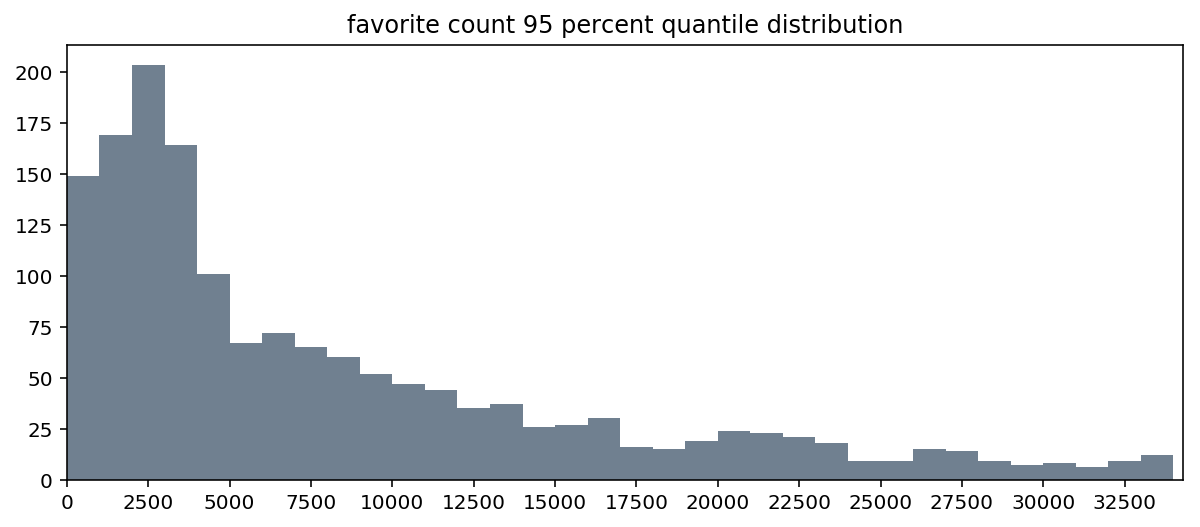

In [62]:
plt.figure(figsize = (10,4))
plt.hist(archive.favorite_count, bins=(np.arange(0, quantile95 + 1000, 1000)),\
         color = base_color)
plt.xlim(0, quantile95 + 1000)
plt.xticks(np.arange(0, quantile95, 2500)) # set stepsize to 2500
plt.title('favorite count 95 percent quantile distribution');

Most tweets favorite count is in the range between 0 and 5000. Passed 5000 favorites, there's a major drop in occurrences.

#### Check the distribution of ``retweet count`` in the ``archive`` df.

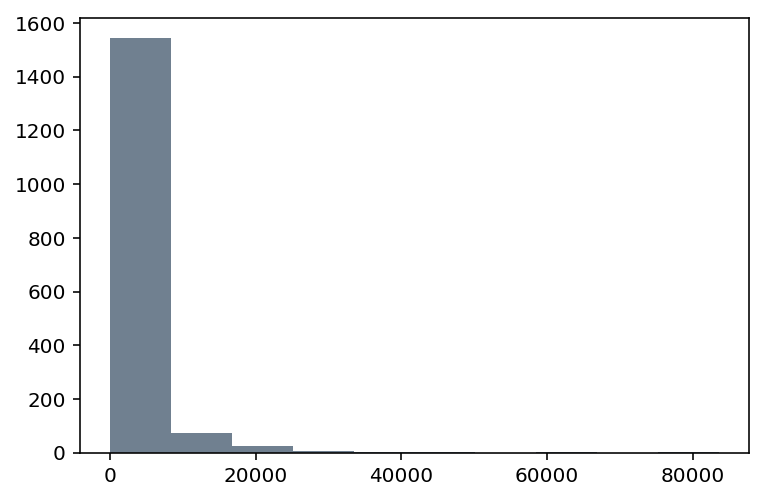

In [63]:
plt.hist(archive.retweet_count, color = base_color);

Same issue as before, hist is heavily skewed to the right.

This time, I want to adress the issue in a different way and apply a logarithmic scale (with base 10) to the x-axis. 

In [64]:
np.log10(archive.retweet_count.describe())

count    3.219060
mean     3.500182
std      3.715501
min      1.079181
25%      2.868350
50%      3.230704
75%      3.560116
max      4.922357
Name: retweet_count, dtype: float64

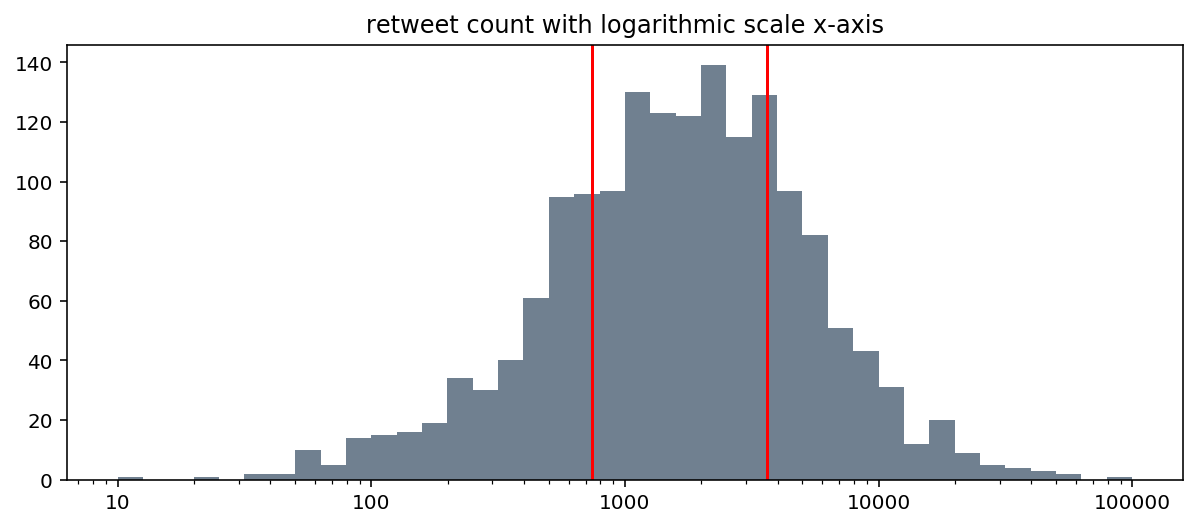

In [65]:
bins = 10 ** (np.arange(1, 5 + 0.1, 0.1)) # first value is min, second is max, third is step size

plt.figure(figsize = (10, 4))
plt.axvline(10 ** 2.868497, c = 'r') # 25 percentile
plt.axvline(10 ** 3.560236, c = 'r') # 75 percentile
plt.hist(archive.retweet_count, bins = bins, color = base_color)
plt.xscale('log')
ticks = [10, 100, 1000, 10000, 100000]
plt.xticks(ticks, ticks)
plt.title('retweet count with logarithmic scale x-axis');

Now the distribution of retweet counts becomes a lot more obvious. The two red lines define the area where 50% of all data point are located (roughly between 725 and 3630 retweets). 

#### Check most common dog type in tweets

In [66]:
top_predictions = predictions[predictions['confidence_order'] == 1] # only consider top predictions

n_points = top_predictions.shape[0] # total number of top predictions

order = top_predictions.prediction.value_counts().head(10).index # order of top 10 most predicted tog types

max_count = top_predictions.prediction.value_counts().max() 
max_prob = max_count / n_points # probability of most common dog type to define limit of x-axis

tick_probs = np.arange(0, max_prob, 0.01) # arange x-ticks in 0.01 steps

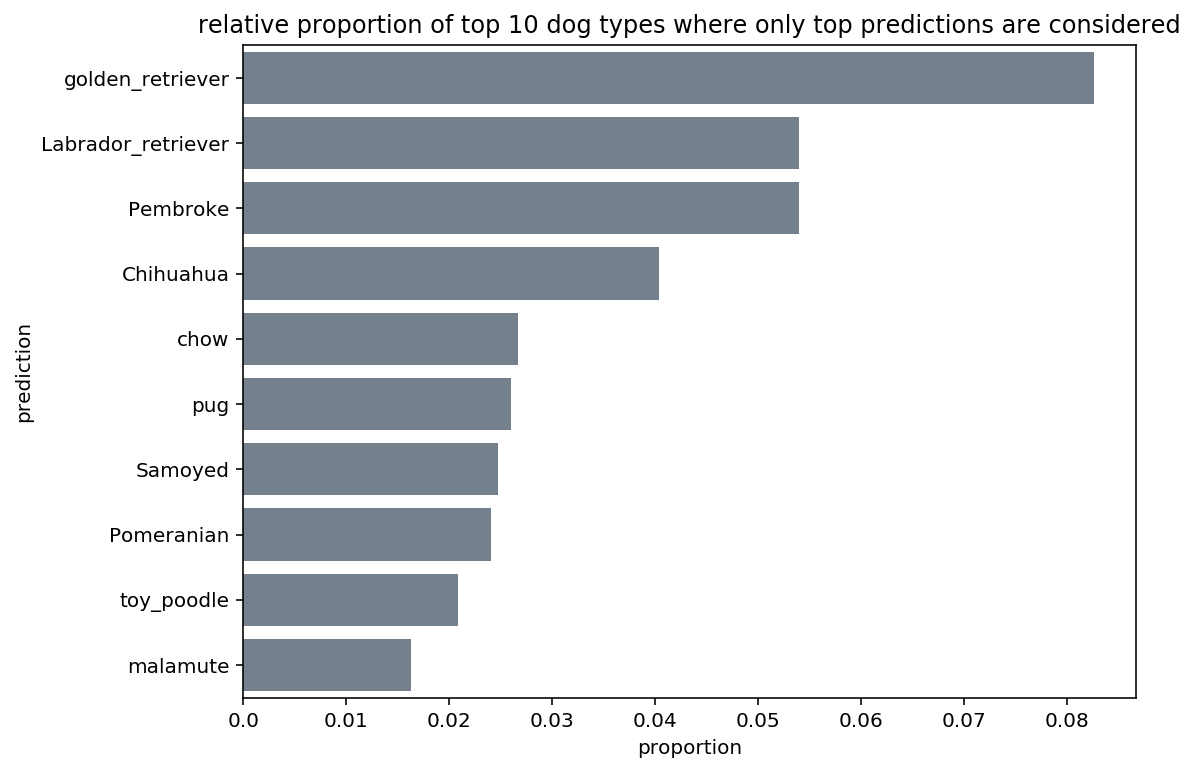

In [67]:
plt.figure(figsize = (8, 6))
sns.countplot(data = top_predictions, y = 'prediction', color = base_color, order = order)
plt.xticks(tick_probs * n_points, tick_probs)
plt.xlabel('proportion')
plt.title('relative proportion of top 10 dog types where only top predictions are considered');

<p style='text-align: justify;'>
The golden retriever is the by far most tweeted tog breed. Nearly 8 percent of all tweets depict one. Second is the golden retrievers close relative - the labrador retriever, closely followed by the Pembroke. The 10th most tweeted dog breed, the Malamute, only has a share of 1.5 percent.
<p style='text-align: justify;'>
#### Check the dog breeds with the highest average ratings

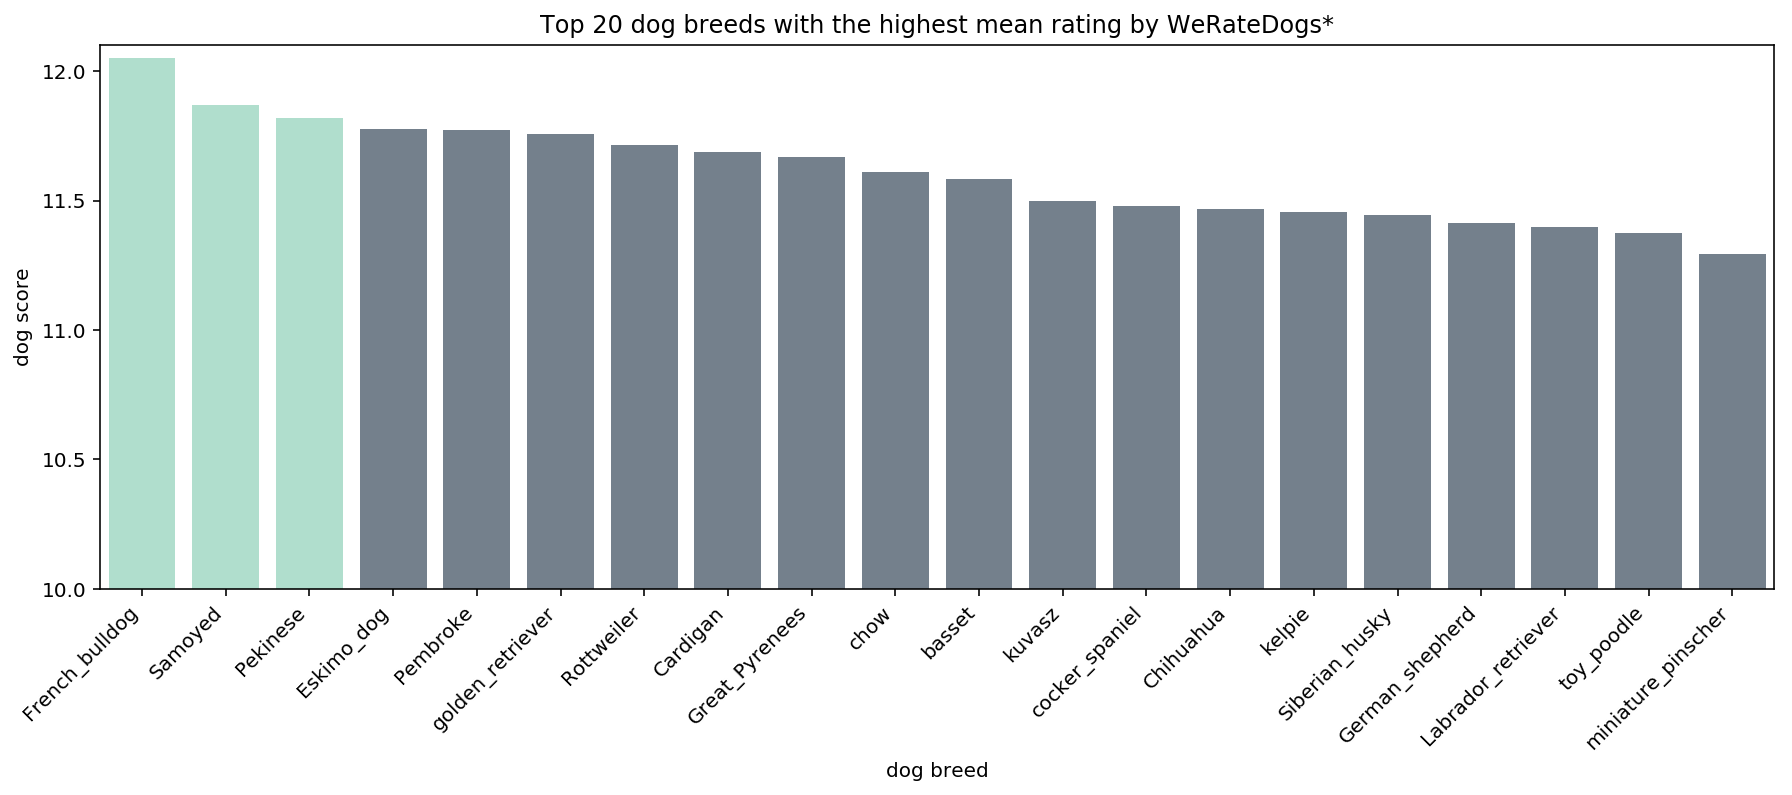

In [68]:
top_predictions = predictions[predictions['confidence_order'] == 1]
# create a counts df which contains the value counts for each dog breed
counts = top_predictions.prediction.value_counts().rename('counts').reset_index()
counts.columns = ['prediction', 'counts']

# merge the counts df with the top predictions df
top_predictions = pd.merge(top_predictions, counts, on = 'prediction')

# only keep dog breeds where the value count is at least 10.
# this ensures that the the plot is not distorted by breeds for which
# only few datapoints exist.
top_predictions = top_predictions[top_predictions['counts'] >= 10]

# merge top_predictions and archive df to have popularity info and prediction in one table
combined = pd.merge(archive, top_predictions, on = 'tweet_id')
# only consider predictions which depict a dog
combined = combined[combined['dog'] == True]

combined_rating = combined.groupby('prediction').mean().sort_values('rating_numerator', ascending = False).reset_index()

clrs = ['#a8e6cf' if (x in list(combined_rating.prediction.head(3)))\
        else base_color for x in combined_rating.prediction]

plt.figure(figsize = (15, 5))
sns.barplot(data = combined_rating.head(20), y = 'rating_numerator', x = 'prediction', palette = clrs)
plt.xticks(rotation = 45, ha = 'right')
plt.ylim(10, 12.1)
plt.yticks(np.arange(10, 12.5, 0.5))
plt.title('Top 20 dog breeds with the highest mean rating by WeRateDogs*')
plt.ylabel('dog score')
plt.xlabel('dog breed');

#### Check whether the most tweeted dog breeds are also the most popular

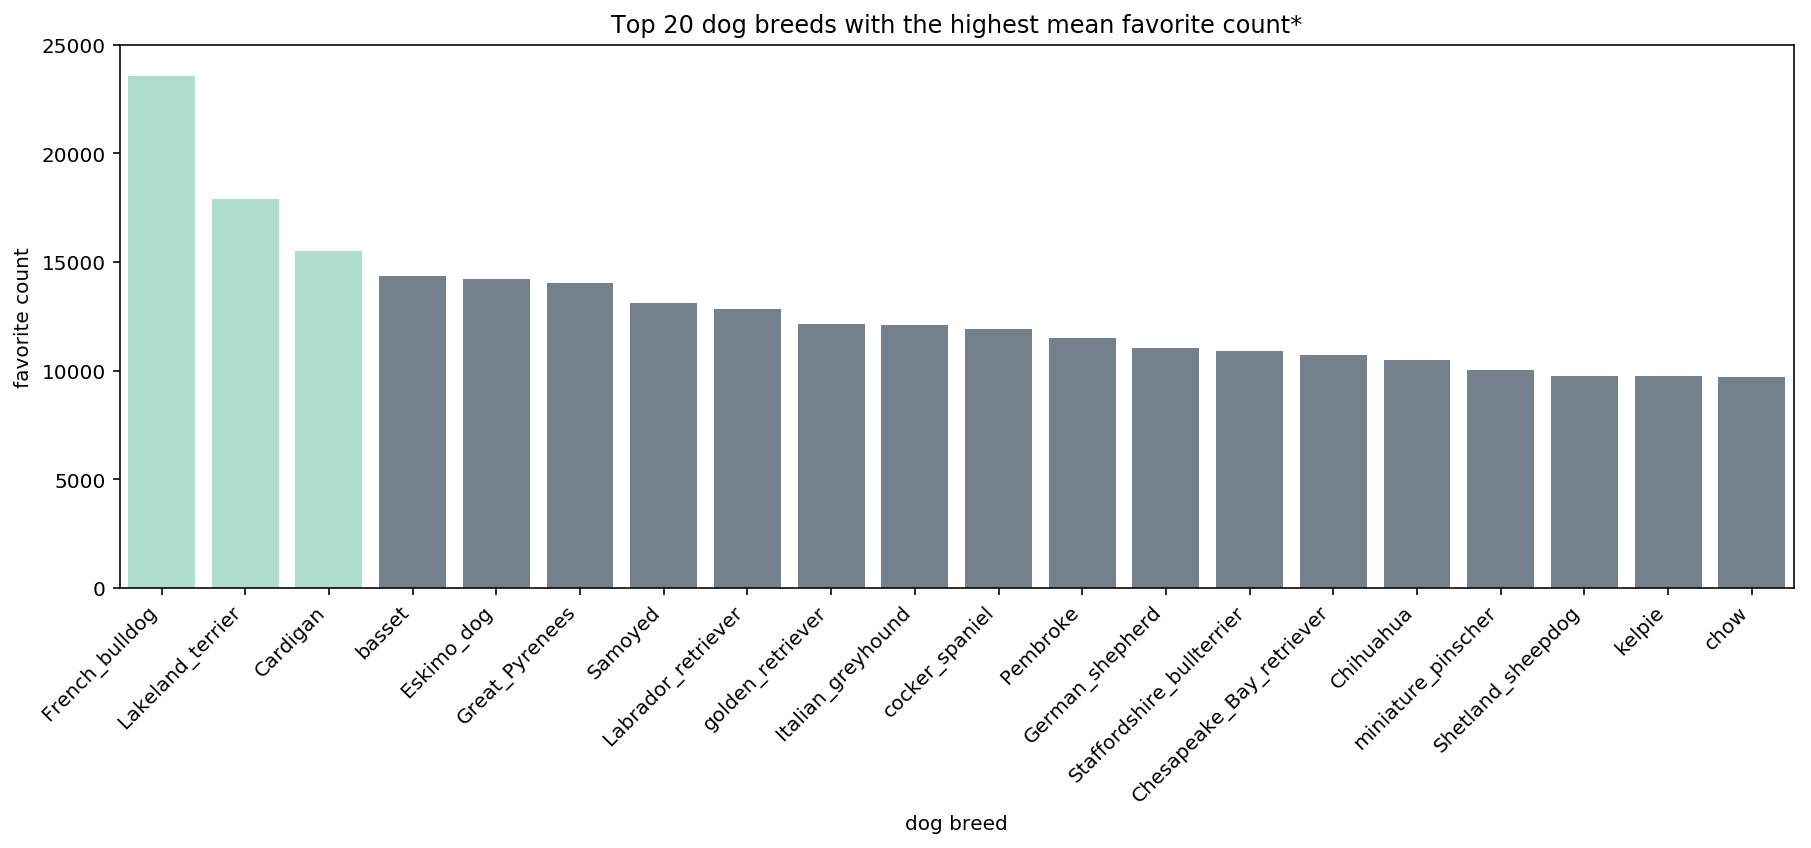

In [69]:
# group the df by prediction and calculate mean, sort by favorite count descending
combined_favorite = combined.groupby('prediction').mean().sort_values('favorite_count', ascending = False).reset_index()

clrs = ['#a8e6cf' if (x in list(combined_favorite.prediction.head(3)))\
        else base_color for x in combined_favorite.prediction]

plt.figure(figsize = (15, 5))
sns.barplot(data = combined_favorite.head(20), y = 'favorite_count', x = 'prediction', palette = clrs)
plt.xticks(rotation = 45, ha = 'right')
plt.ylim(0, 25000)
plt.title('Top 20 dog breeds with the highest mean favorite count*')
plt.ylabel('favorite count')
plt.xlabel('dog breed');

\* only dog breeds which are present in at least 10 tweets are considered to avoid distortion.

<p style='text-align: justify;'>
Although the Labrador Retriever was shown to be the most common dog breed tweeted, it only ranks 8th in popularity. The most liked dog breed is the French Bulldog with an average of just under 25,000 likes per tweet. The Lakeland Terrier ranks second, followed by the Cardigan. 
<p style='text-align: justify;'>

#### Which dog stage is the most common?

In [70]:
n = archive.dog_stage.count()
n

290

In [71]:
n_max = archive.dog_stage.value_counts().max()
p_max = n_max / n
ticks = np.arange(0, p_max, 0.10)
labels = ['{:.1f}'.format(v) for v in ticks]

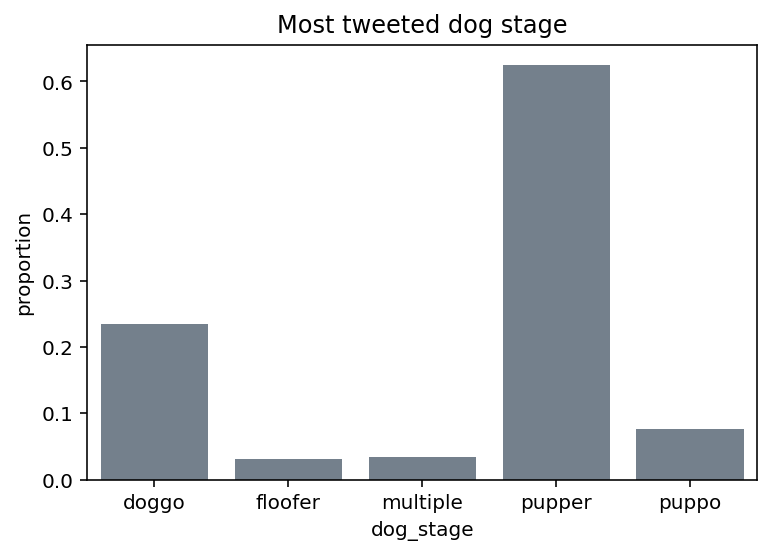

In [72]:
sns.countplot(data = archive, x = 'dog_stage', color = base_color)
plt.yticks(ticks * n, labels)
plt.ylabel('proportion')
plt.title('Most tweeted dog stage');

The dog stage was only retrieved for 290 of the total 1656 tweets. However, 60% of those 290 tweets depicted a pupper, followed by doggo with a little less than 30%. Floofers and puppos made up for less than 10% each.

### Bivariate Data Exploration
<a id='bivariate'></a>

#### Are there differences in mean favorite & retweet count for different dog stages?

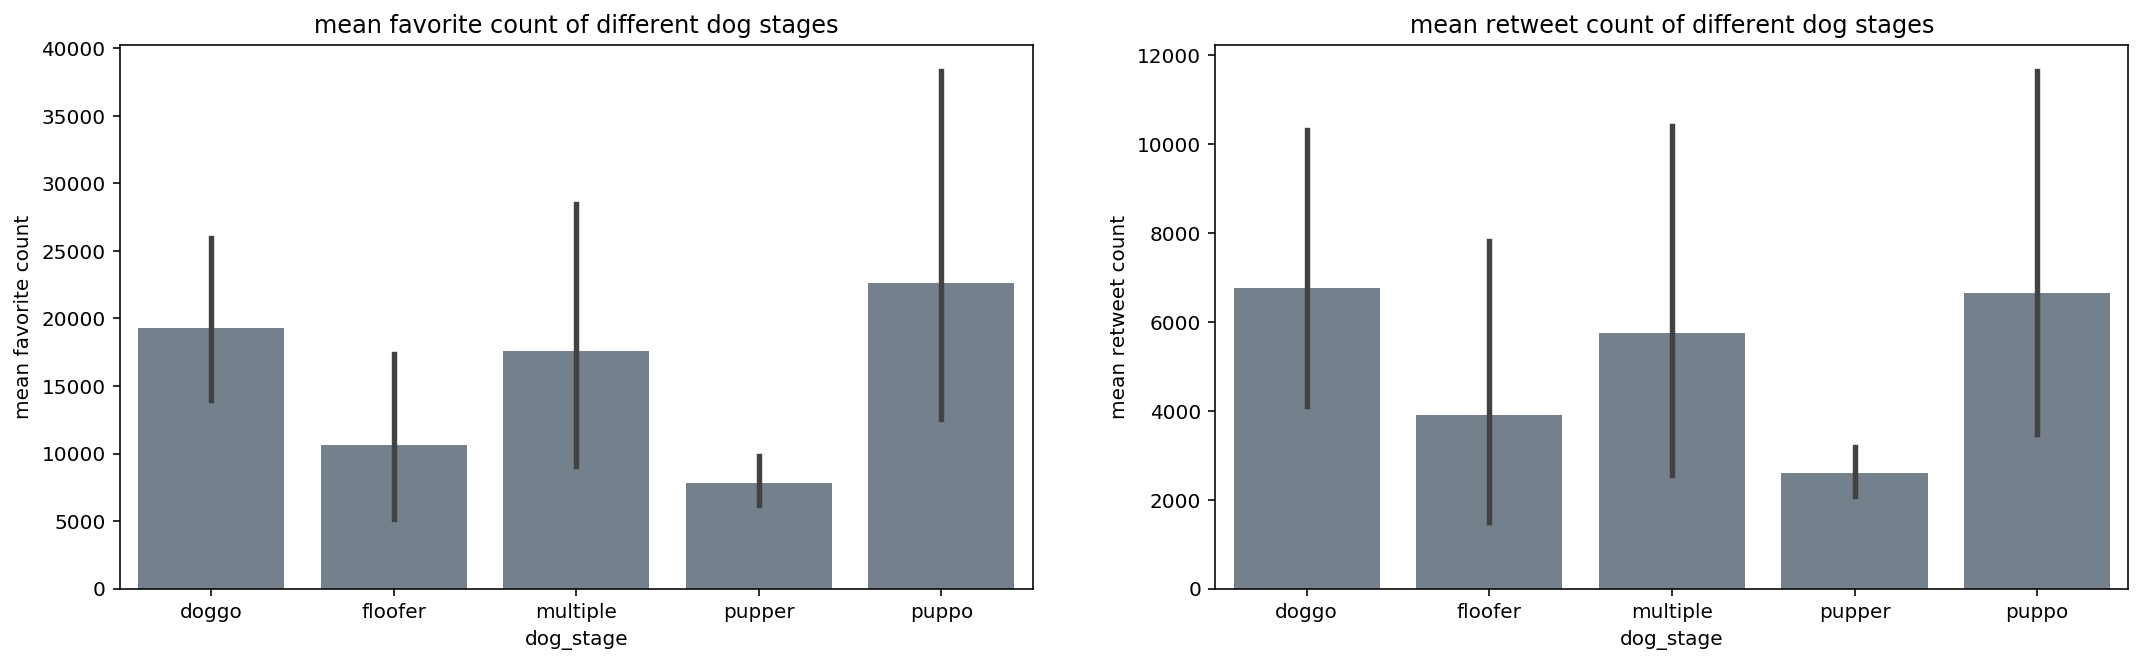

In [73]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
sns.barplot(data = archive, x = 'dog_stage', y = 'favorite_count',\
            color = base_color)
plt.ylabel('mean favorite count')
plt.title('mean favorite count of different dog stages');

plt.subplot(1, 2, 2)
sns.barplot(data = archive, x = 'dog_stage', y = 'retweet_count',\
            color = base_color)
plt.ylabel('mean retweet count')
plt.title('mean retweet count of different dog stages');

#### Check the mean rating score for different dog stages

On average, tweets with dogs in stages doggo and puppo receive more favorites and retweets than floofers and puppers. The black line represents the mean uncertainty.

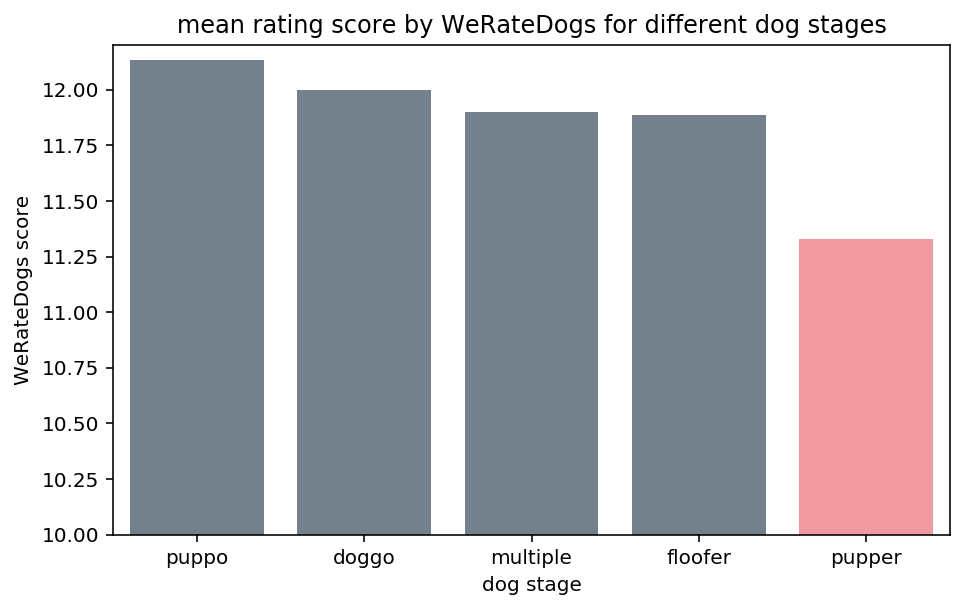

In [74]:
rating1 = archive.groupby('dog_stage').mean().sort_values('rating_numerator', ascending = False).reset_index()
clrs = ['#ff8b94' if (x in list(rating1.dog_stage.tail(1))) else base_color for x in rating1.dog_stage]

plt.figure(figsize=(7.5, 4.5))
sns.barplot(data = rating1, x = 'dog_stage', y = 'rating_numerator',\
            order = rating1.dog_stage, palette = clrs, ci = False)
plt.ylim(10, 12.2)
plt.ylabel('WeRateDogs score')
plt.xlabel('dog stage')
plt.title('mean rating score by WeRateDogs for different dog stages');

The same goes for the mean rating score for different dog stages. Puppos reiceive the on average highest score, puppers the on average lowest. 

#### How do different variables evolve over time?

In [75]:
groupby_month = archive.groupby(pd.Grouper(key = 'timestamp', freq = 'M'))\
                [['retweet_count', 'favorite_count', 'followers_count']].mean().reset_index()

groupby_month.head(3)

,timestamp,retweet_count,favorite_count,followers_count
0,2015-11-30,581.600000,1463.168750,7.631174e+06
1,2015-12-31,1804.698276,4177.840517,7.631162e+06
2,2016-01-31,1586.678832,4042.248175,7.631145e+06


Resource: [Group by month](https://stackoverflow.com/questions/24082784/pandas-dataframe-groupby-datetime-month)

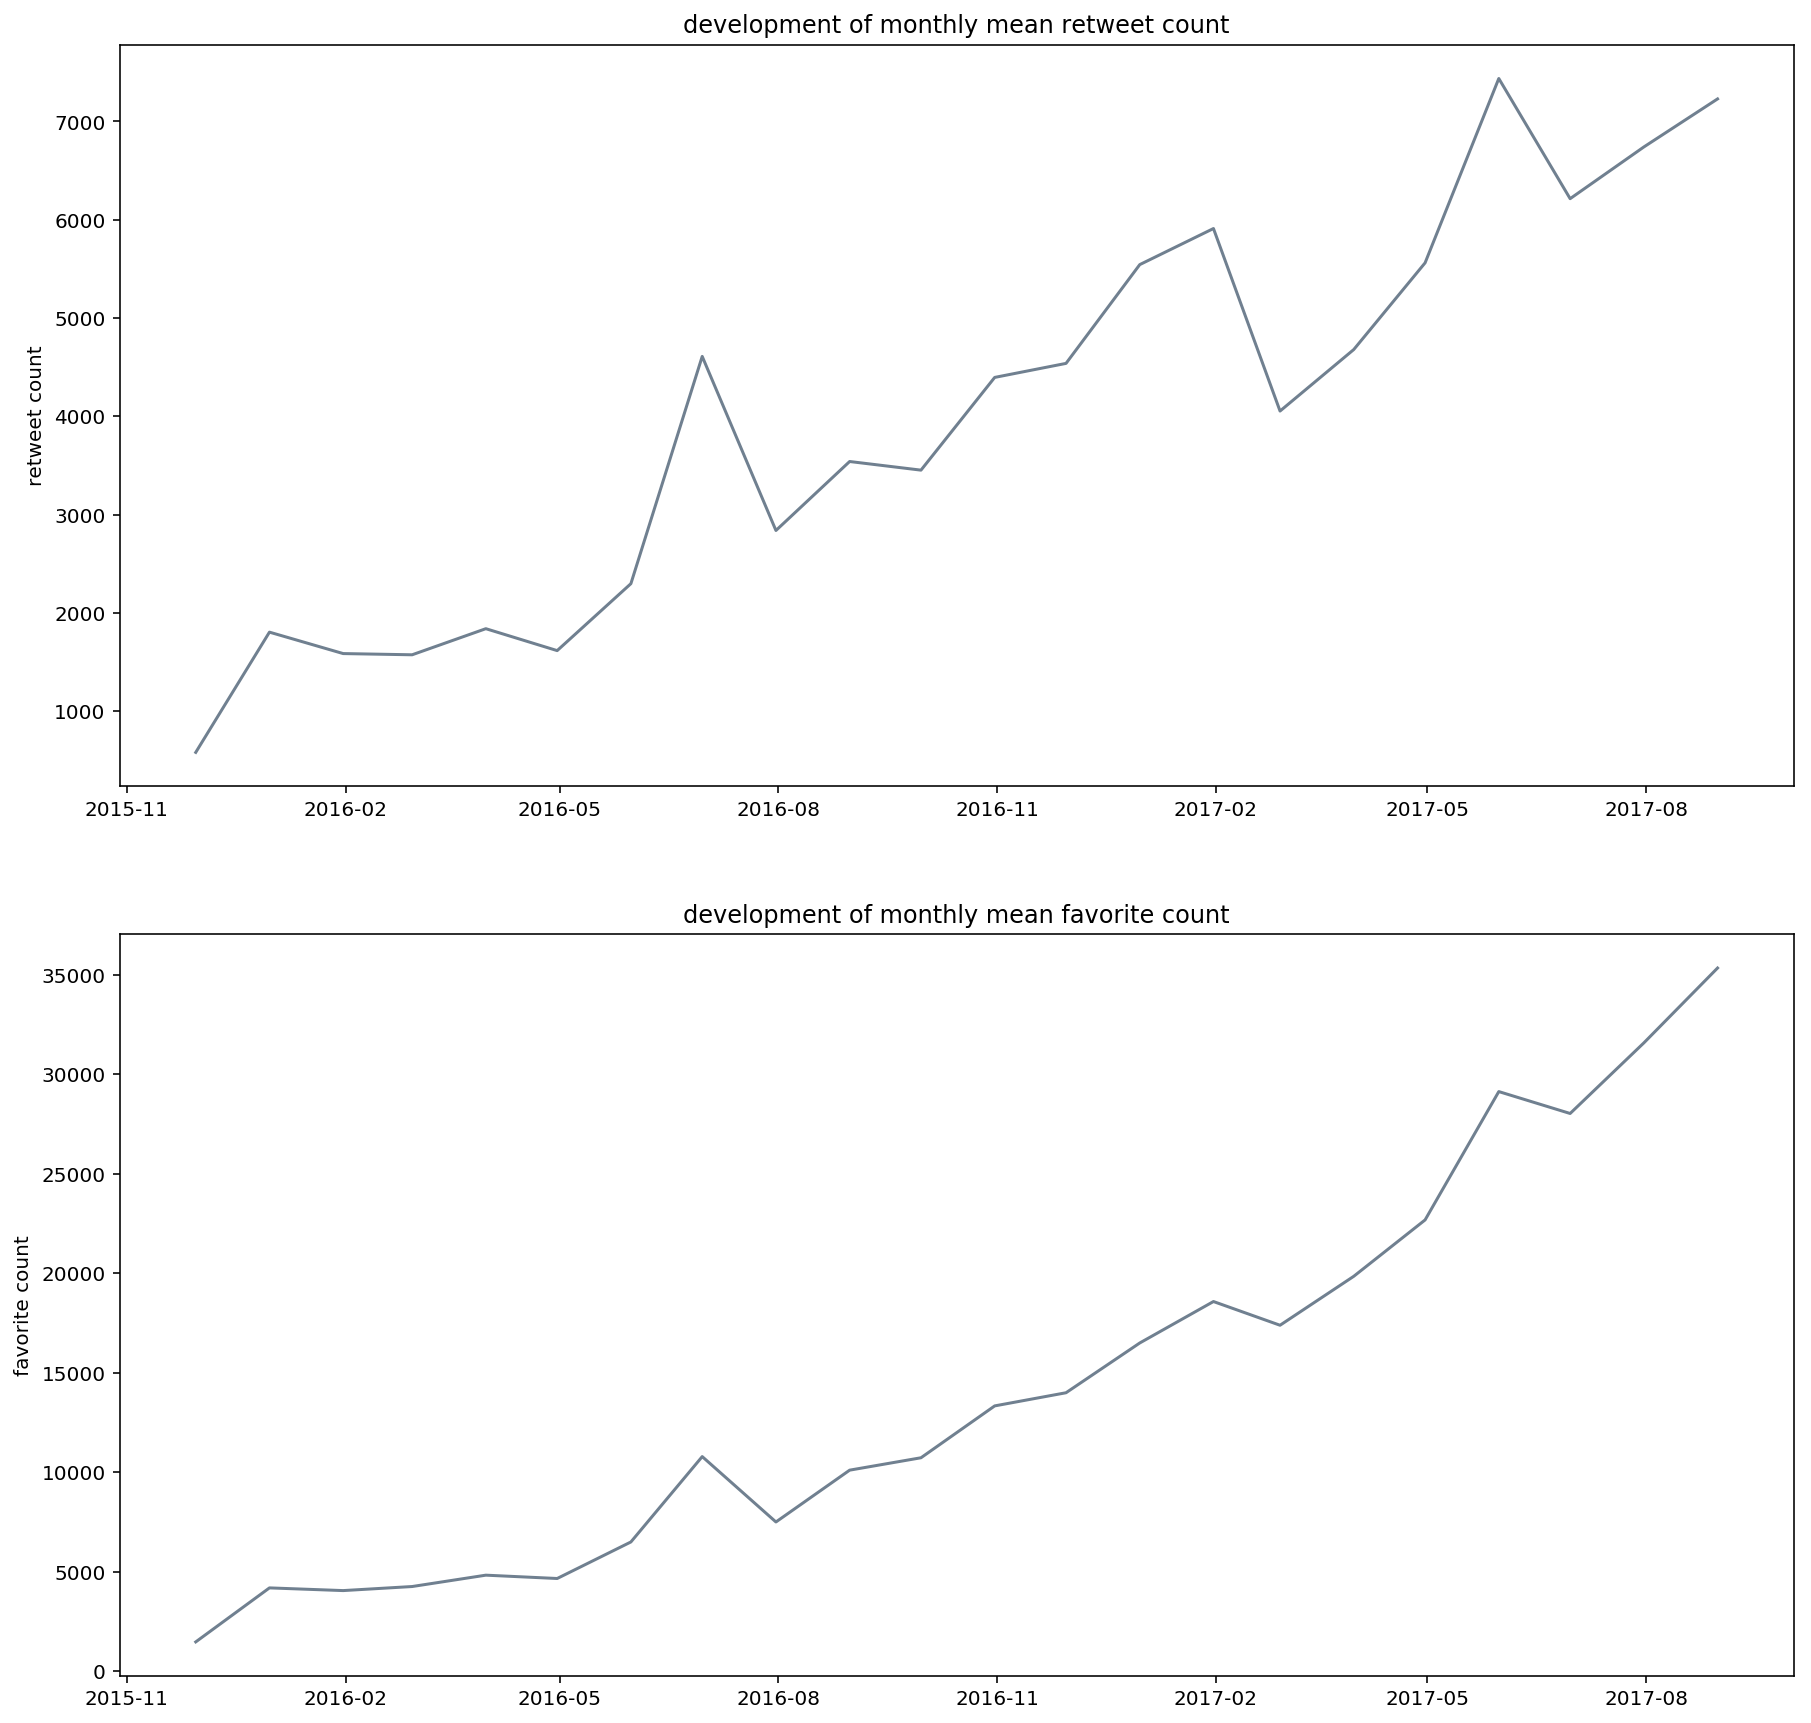

In [76]:
plt.figure(figsize = (15, 15))

plt.subplot(2, 1, 1)
plt.plot(groupby_month.timestamp, groupby_month.retweet_count, color = base_color)
plt.title('development of monthly mean retweet count')
plt.ylabel('retweet count');

plt.subplot(2, 1, 2)
plt.plot(groupby_month.timestamp, groupby_month.favorite_count, color = base_color)
plt.title('development of monthly mean favorite count')
plt.ylabel('favorite count');

Both retweet and favorite count experience a major increase over the course of 22 months. 

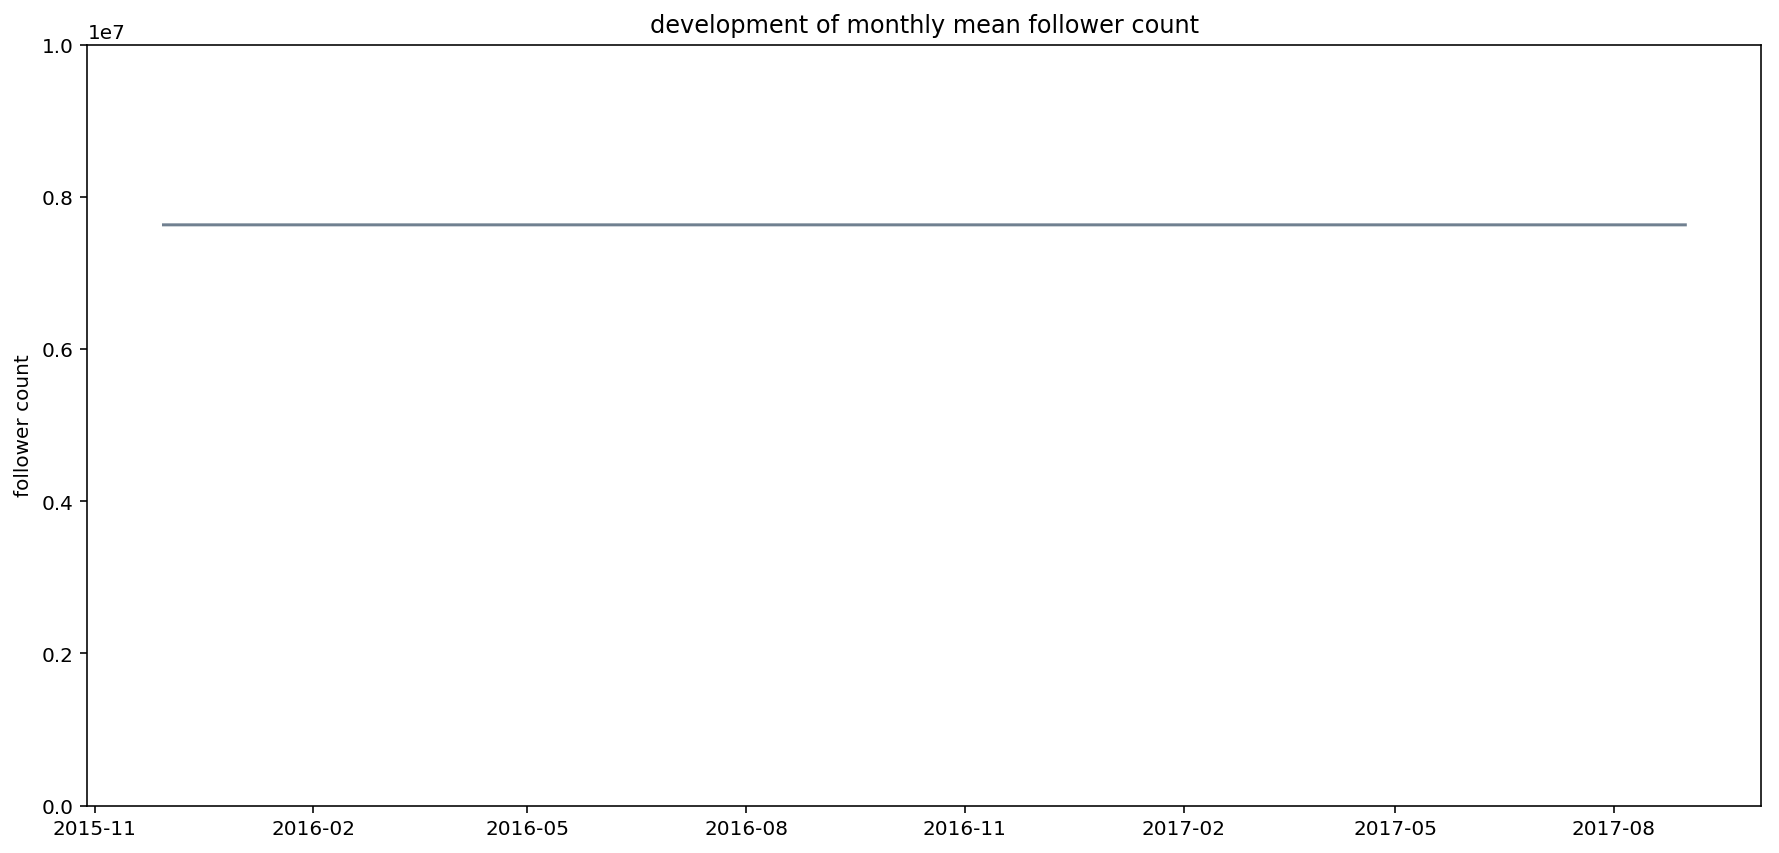

In [77]:
plt.figure(figsize = (15, 7))
plt.plot(groupby_month.timestamp, groupby_month.followers_count, color = base_color)
plt.ylim(0, 10000000)
plt.title('development of monthly mean follower count')
plt.ylabel('follower count');

The follower count on the other hand experienced only marginal changes over the analysed time period. This is not exactly what I expected as intuition makes me think that favorite and retweet count should be somewhat proportional to follower count.

### Multivariate Data Exploration
<a id='multivariate'></a>

#### Does WeRateDogs tweet rating affect the retweet and favorite count?

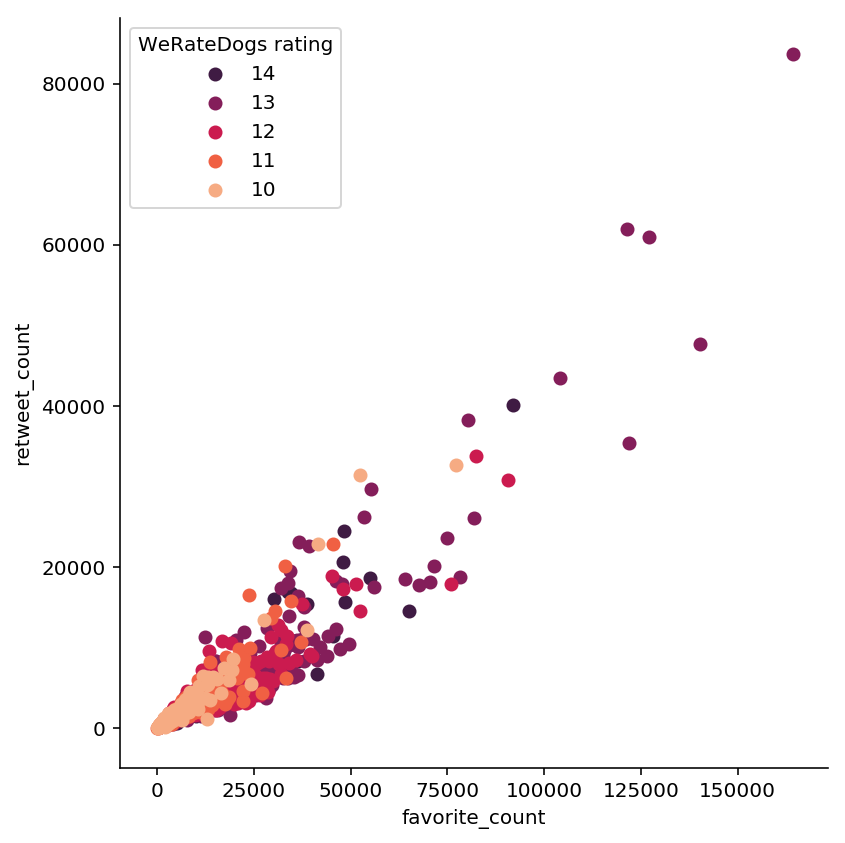

In [78]:
g = sns.FacetGrid(data = archive, hue = 'rating_numerator', size = 6,\
                  hue_order = [14, 13, 12, 11, 10], palette = 'rocket')
g.map(plt.scatter, 'favorite_count', 'retweet_count')
plt.legend(title = 'WeRateDogs rating');

Darker points (higher ratings) seem to be more located towards the top right. Therefore it does look like a high rating by WeRateDogs increases the probability of a tweet to go viral. Let's only plot the 95 percent quantile.

In [79]:
print(archive.favorite_count.quantile(0.95))
archive.retweet_count.quantile(0.95)

33290.5


10274.5

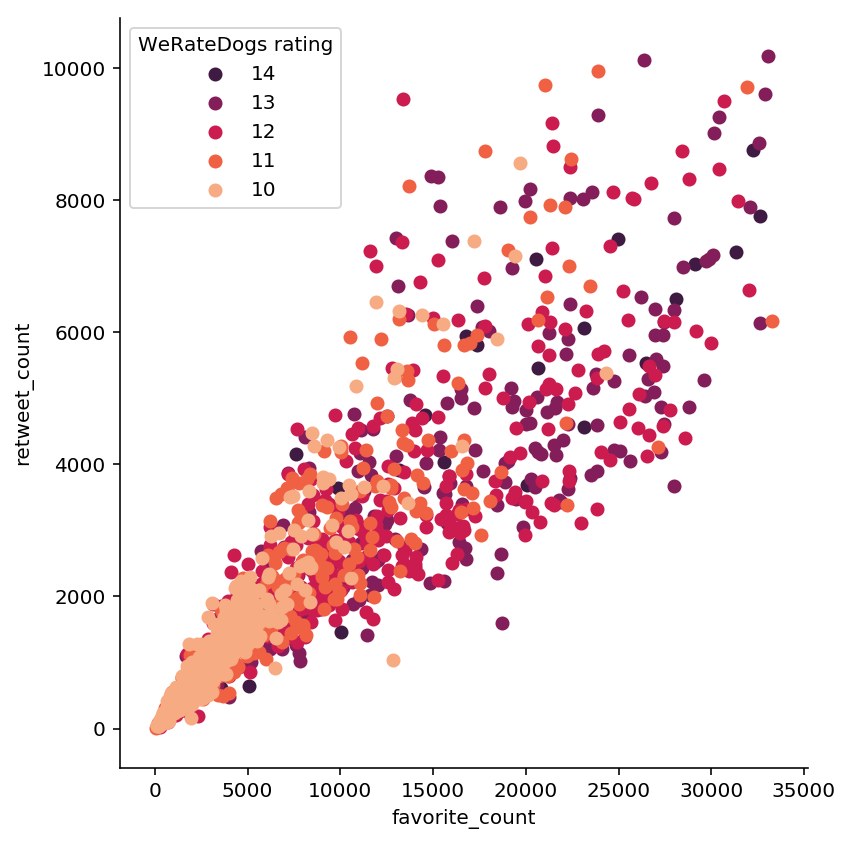

In [80]:
# only plot 95 percent quantile
data = archive.query('favorite_count < 33302.75 and retweet_count < 10281')

g = sns.FacetGrid(data = data, hue = 'rating_numerator', size = 6,\
                  hue_order = [14, 13, 12, 11, 10], palette = 'rocket')
g.map(plt.scatter, 'favorite_count', 'retweet_count')
plt.legend(title = 'WeRateDogs rating');

Faciting of the above plot:

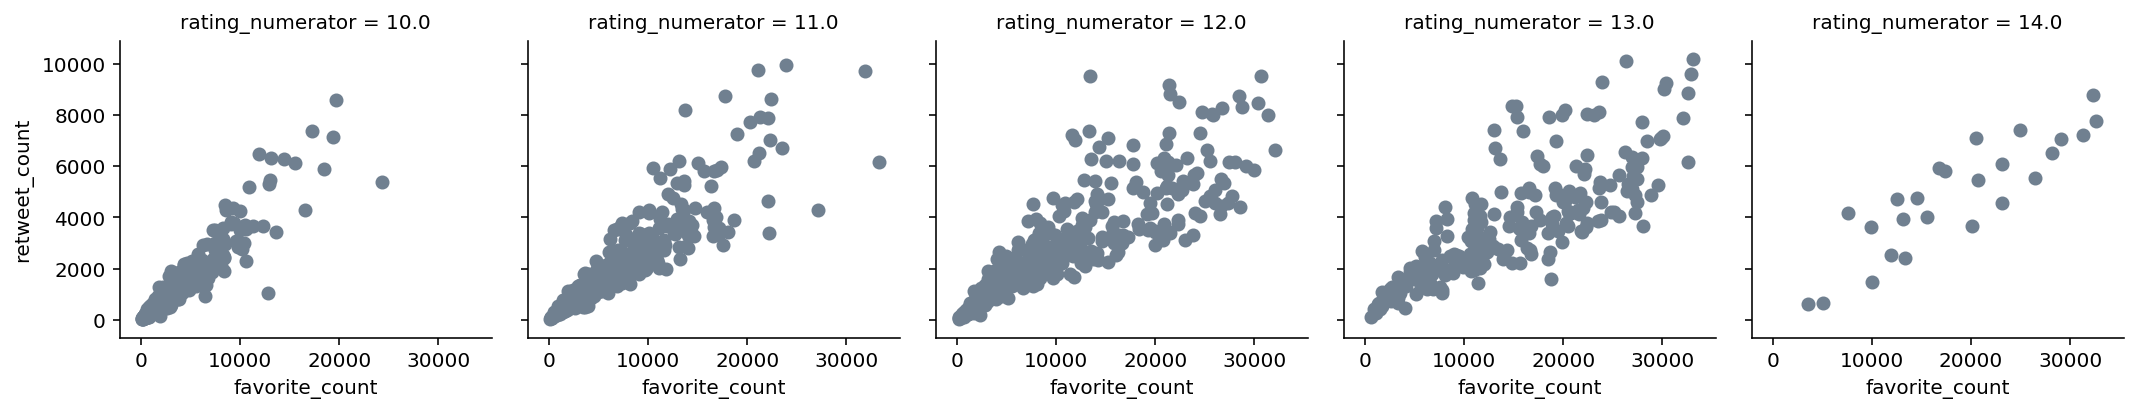

In [81]:
g = sns.FacetGrid(data = data, col = 'rating_numerator')
g.map(plt.scatter, 'favorite_count', 'retweet_count', color = base_color);

Check the 95 percentile mean retweet & favorite count for each rating category:

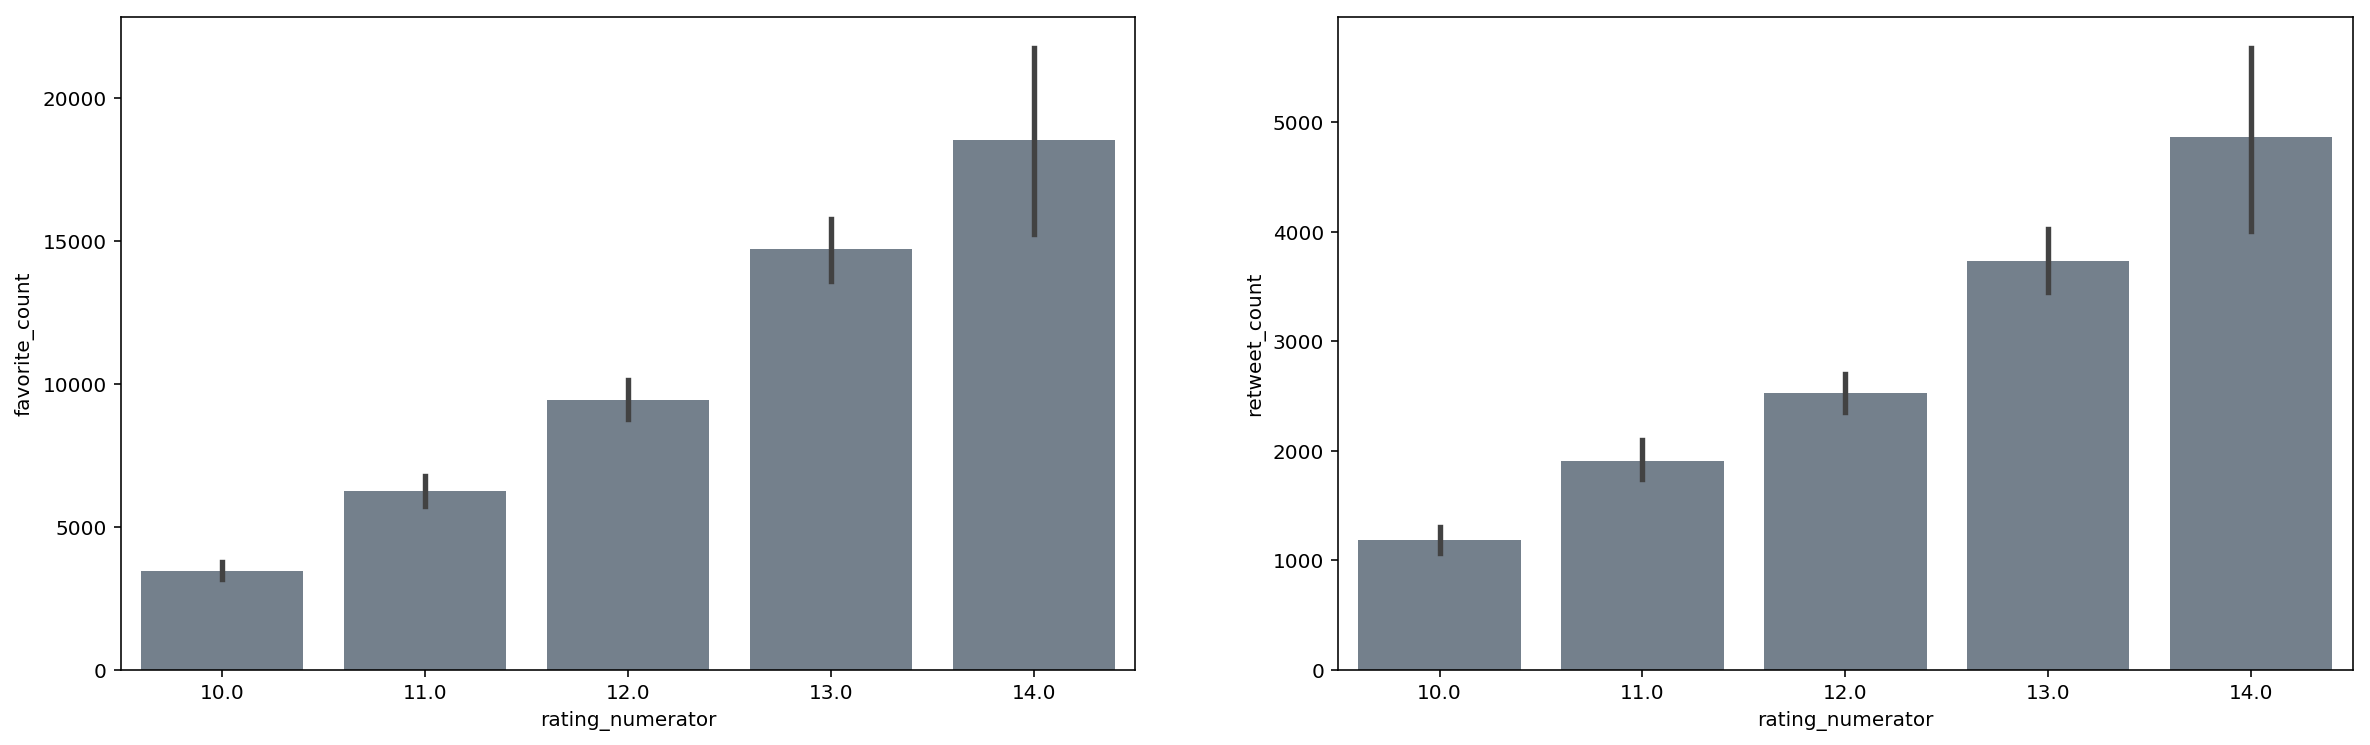

In [82]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(data = data, x = 'rating_numerator', y = 'favorite_count',\
            color = base_color);

plt.subplot(1, 2, 2)
sns.barplot(data = data, x = 'rating_numerator', y = 'retweet_count',\
            color = base_color);

Both figures support first observation that a high rating by WeRateDog's can favour a tweet to go viral. This does however not mean that a high rating actually causes a tweet to go viral, they are just more likely to.

### Bonus Top Tweets
<a id='bonus'></a>

#### What are characteristics of the top 5 most favorited posts?

In [83]:
top5_index = archive.favorite_count.nlargest(5).index # get index of top 5 tweets
top5 = archive[['tweet_id', 'rating_numerator', 'dog_stage', 'favorite_count',\
                'retweet_count', 'text']].iloc[top5_index]

top_tweet_ids = top5.tweet_id # get tweet ids of top 5 tweets to query predictions df
top_tweet_ids = list(top_tweet_ids) # convert to list
top5pred = predictions[predictions['tweet_id'].isin(top_tweet_ids)] # query predictions df
top5pred = top5pred[top5pred['confidence_order'] == 1] # only consider top predictions

In [84]:
top5

,tweet_id,rating_numerator,dog_stage,favorite_count,retweet_count,text
788,744234799360020481,13.0,doggo,164239,83629,Here's a doggo realizing you can stand in a po...
322,822872901745569793,13.0,puppo,140342,47683,Here's a super supportive puppo participating ...
414,807106840509214720,13.0,NaN,126982,60955,This is Stephan. He just wants to help. 13/10 ...
114,866450705531457537,13.0,pupper,121903,35431,This is Jamesy. He gives a kiss to every other...
818,739238157791694849,13.0,doggo,121289,61933,Here's a doggo blowing bubbles. It's downright...


In [85]:
top5pred[['tweet_id', 'prediction', 'jpg_url']]

,tweet_id,prediction,jpg_url
2331,739238157791694849,Eskimo_dog,https://pbs.twimg.com/ext_tw_video_thumb/73923...
2409,744234799360020481,Labrador_retriever,https://pbs.twimg.com/ext_tw_video_thumb/74423...
3432,807106840509214720,Chihuahua,https://pbs.twimg.com/ext_tw_video_thumb/80710...
3699,822872901745569793,Lakeland_terrier,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
4287,866450705531457537,French_bulldog,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg


The 5 most favorited tweets all have a rating of 13. 4 out of 5 tweets define the dog stage in the tweet. The tweet with the highest favorite count depicts a 'labrador retriever' at dog stage 'doggo'.

#### Are the most favorited tweets also the most retweetet?

Query the index of the top 10 most favorited and retweeted tweets and check how many ids are shared in both lists.

In [86]:
archive.favorite_count.nlargest(10).index.isin(archive.retweet_count.nlargest(10).index)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

8 of the 10 most favorited tweets are also in the list of the top 10 most retweeted tweets.

#### Coming to en end, here are the most favorited tweets:

In [87]:
def plt_tweet(text, archive_index, prediction_index):
    print(text)
    print('Tweet Text: ' + top5.text.loc[archive_index])
    print('Favorite count: ' + str(top5.favorite_count.loc[archive_index]))
    print('Retweet count: ' + str(top5.retweet_count.loc[archive_index]))
    print('Prediction: ' + top5pred.prediction[prediction_index])
    return Image(url = top5pred.jpg_url.loc[prediction_index], width = 250)

In [88]:
plt_tweet('Top Tweet', 788, 2409)

Top Tweet
Tweet Text: Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)
Favorite count: 164239
Retweet count: 83629
Prediction: Labrador_retriever


#### Second most favorited tweet:

In [89]:
plt_tweet('2nd most popular tweet', 322, 3699)

2nd most popular tweet
Tweet Text: Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10
Favorite count: 140342
Retweet count: 47683
Prediction: Lakeland_terrier


#### Third most favorited tweet:

In [90]:
plt_tweet('3rd most popular tweet', 414, 3432)

3rd most popular tweet
Tweet Text: This is Stephan. He just wants to help. 13/10 such a good boy
Favorite count: 126982
Retweet count: 60955
Prediction: Chihuahua
